In [1]:
%matplotlib inline
# Support Vector Machines (SVM) is one of the techniques that
# doesn't have an easy probabilistic interpretation.
# SVMs find a plane that separates the group of the dataset the
# "best". Separation means that the choice of the plane maximizes
# the margin between the closest points on the plane.
# These points are called Support Vectors.

In [2]:
from sklearn import datasets
X, y = datasets.make_classification()

In [4]:
# We want to create a Support Vector Classifier (SVC)
# Steps:
#  1. Create an SVC object and fit it to fake data.
#  2. Fit the SVC object to example data.
#  3. Discuss SVC options.

In [5]:
from sklearn.svm import SVC

In [6]:
base_svm = SVC()

In [7]:
base_svm.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [8]:
# Params:
#  C: Scale the error on the margin. Bigger C means bigger penalty
# which will cause the SVM to find a narrower margin.
#  class_weight: How much weight to give each class. This should
# be a dict object with class as key and weight as values.
#  gamma: gamma parameter for the kernel; rgb, sigmoid, ploy.
#  kernel: the kernel to use. default (linear)

In [9]:
X, y = datasets.make_blobs(n_features=2, centers=2)
from sklearn.svm import LinearSVC

In [10]:
svm = LinearSVC()

In [11]:
svm.fit(X, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [12]:
from itertools import product
from collections import namedtuple
import numpy as np

Point = namedtuple('Point', ['x', 'y', 'outcome'])
decision_boundary = []
xmin, xmax = np.percentile(X[:, 0], [0, 100])
ymin, ymax = np.percentile(X[:, 1], [0, 100])

In [13]:
for xpt, ypt in product(np.linspace(xmin-2.5, xmax+2.5, 20),
                        np.linspace(ymin-2.5, ymax+2.5, 20)):
    p = Point(xpt, ypt, svm.predict([xpt, ypt]))
    decision_boundary.append(p)

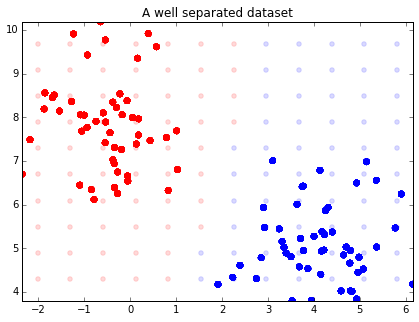

In [14]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(7,5))
colors = np.array(['r', 'b'])
for xpt, ypt, pt in decision_boundary:
    ax.scatter(xpt, ypt, color=colors[pt[0]], alpha=.15)
    ax.scatter(X[:, 0], X[:, 1], color=colors[y], s=30)
    ax.set_ylim(ymin, ymax)
    ax.set_xlim(xmin, xmax)
    ax.set_title('A well separated dataset')

In [20]:
X, y = datasets.make_classification(n_features=2,
                                    n_classes=2,
                                    n_informative=2,
                                    n_redundant=0)
svm = LinearSVC()
svm.fit(X, y)
xmin, xmax = np.percentile(X[:, 0], [0, 100])
ymin, ymax = np.percentile(X[:, 1], [0, 100])

test_points = np.array([[xx, yy] for xx, yy in
                        product(np.linspace(xmin, xmax),
                                  np.linspace(ymin, ymax))])
test_preds = svm.predict(test_points)

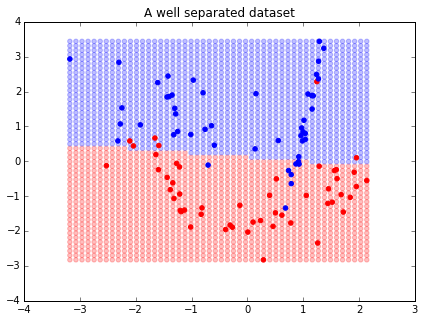

In [21]:
f, ax = plt.subplots(figsize=(7,5))
ax.scatter(test_points[:, 0], test_points[:, 1],
           color=colors[test_preds], alpha=.25)
ax.scatter(X[:, 0], X[:, 1], color=colors[y])
ax.set_title('A well separated dataset')

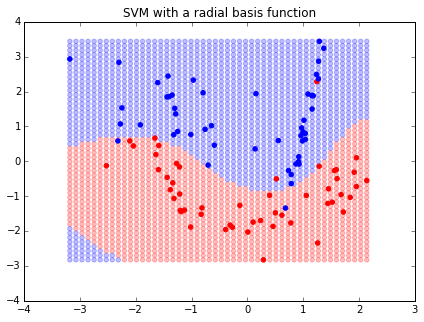

In [23]:
radial_svm = SVC(kernel='rbf')
radial_svm.fit(X, y)
xmin, xmax = np.percentile(X[:, 0], [0, 100])
ymin, ymax = np.percentile(X[:, 1], [0, 100])

test_points = np.array([[xx, yy] for xx, yy in
                          product(np.linspace(xmin, xmax),
                                  np.linspace(ymin, ymax))])
test_preds = radial_svm.predict(test_points)
f, ax = plt.subplots(figsize=(7,5))
ax.scatter(test_points[:, 0], test_points[:, 1],
           color=colors[test_preds], alpha=.25)
ax.scatter(X[:, 0], X[:, 1], color=colors[y])
ax.set_title('SVM with a radial basis function')